# Biodiversity in National Parks

## Project Scoping

### Goals

First I want to get an overview over the situation of the biodiversity in national parks. After that I want to get insights for the following subjects:
- Has there been an improvement or a deterioration in biodiversity?
- How about future trends?
- What are the reasons for improvement/deterioration?

### Actions

One factor could be the amount of capital a national park has for investing in their biodiversity. 

### Data

The data is gathered from the National Parks Service about endangered species in different parks.

### Analysis

Following steps are given:
- Data Wrangling and Tidying
- Data Manipulation with Pandas
- Data Visualization
- Hypothesis Testing
- Summarizing Quantitative Data

## Exploratory Data Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading csv files
species_info = pd.read_csv("species_info.csv")
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [3]:
observation = pd.read_csv("observations.csv")
print(observation.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [4]:
# overview of species_info
print(species_info.describe())
print(species_info.info())

              category scientific_name        common_names conservation_status
count             5824            5824                5824                 191
unique               7            5541                5504                   4
top     Vascular Plant  Holcus lanatus  Brachythecium Moss  Species of Concern
freq              4470               3                   7                 161
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [5]:
# overview of obersvations
print(observation.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [6]:
# what types do we have?
print(species_info.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [7]:
# let's look at the distribution of conservation_status
# But before we need to drop the rows with NaN values, since this won't show a histogram
species_info.dropna(subset=['conservation_status'], inplace = True)
print(species_info.describe())

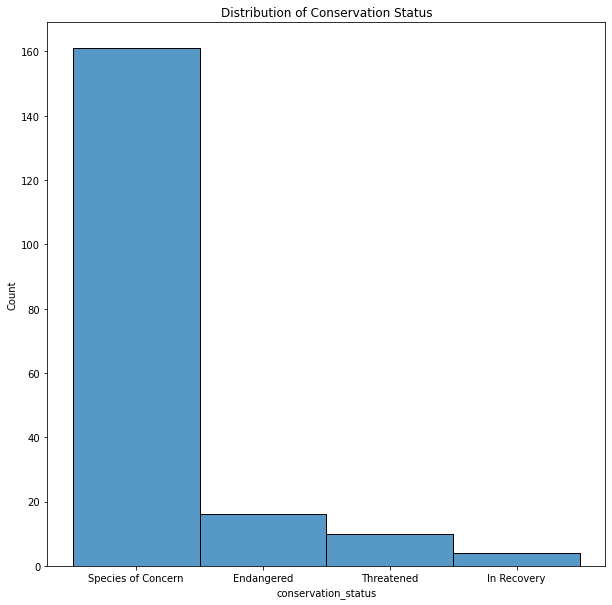

<Figure size 432x288 with 0 Axes>

In [11]:
# Now we create a histogram to look at the distribution of conservation_status
plt.figure(figsize=(10,10))
sns.histplot(data=species_info, x="conservation_status")
plt.title("Distribution of Conservation Status")
plt.show()
plt.clf()

In [13]:
# let's look at the endangered animals
endangered = species_info[species_info['conservation_status'] == 'Endangered']
print(endangered)

            category               scientific_name  \
8             Mammal                   Canis lupus   
9             Mammal                   Canis rufus   
34            Mammal             Myotis grisescens   
39            Mammal                Myotis sodalis   
72            Mammal  Glaucomys sabrinus coloratus   
173             Bird                Grus americana   
276             Bird           Vermivora bachmanii   
343             Bird             Picoides borealis   
540             Fish          Etheostoma percnurum   
570             Fish               Noturus baileyi   
2497  Vascular Plant                 Geum radiatum   
3275            Fish             Chasmistes liorus   
4446          Mammal       Ovis canadensis sierrae   
4448          Mammal                   Canis lupus   
4505            Bird       Gymnogyps californianus   
4601       Amphibian                  Rana sierrae   

                                           common_names conservation_status  
8  

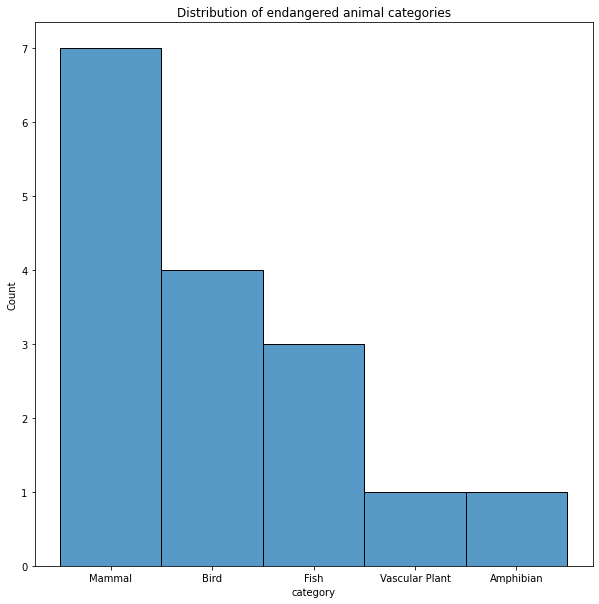

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(10,10))
sns.histplot(data=endangered, x="category")
plt.title("Distribution of endangered animal categories")
plt.show()
plt.clf()